# Entropiecodierung
## 1 Informationsgehalt
In der Vorlesung haben wir gelernt, dass Information einer Reduktion der Anzahl von Möglichkeiten entspricht. Genaugenommen gilt für eine Reduktion von n auf m Möglichkeiten, dass wir eine Information von  gewonnen haben.
### 1.1 Information der Wortlänge
Bestimmen Sie die Information, die wir gewinnen, wenn wir die Länge eines Wortes kennen. Welche Information gewinnen wir z.B. wenn wir wissen, dass ein Wort 5 Buchstaben hat?

Stellen Sie den Zusammenhang zwischen Wortlänge und gewonnener Information in einer Grafik dar.

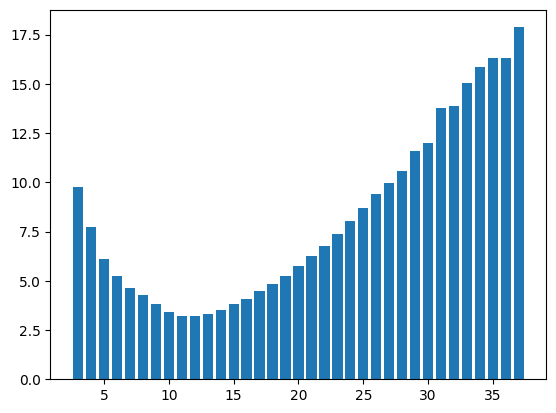

In [70]:
from math import log2
from collections import Counter
import matplotlib.pyplot as plt

words = open("../wortliste/wortliste.txt").readlines()

wordlen_count = Counter([len(line) for line in words])
word_dict = {
    length: log2(len(words) / count) for (length, count) in wordlen_count.items()
}

fig, ax = plt.subplots()
ax.bar(word_dict.keys(), word_dict.values())
plt.show()

### 1.2 Information der einzelnen Buchstaben
Bestimmen Sie für die einzelnen Buchstaben in dem Wort „Xylofon“, welche Information Sie beitragen, wenn Sie an „ihrer Position“ in einem Wort mit 8 Buchstaben stehen.

Also z.B. welche Information gewinnen wir, wenn wir wissen, dass in einem Wort mit 8 Buchstaben an Position 3 ein „l“ steht.

Stellen Sie das Ergebnis als Balkendiagramm dar. Verwenden Sie als „xticklabels“ die Buchstaben

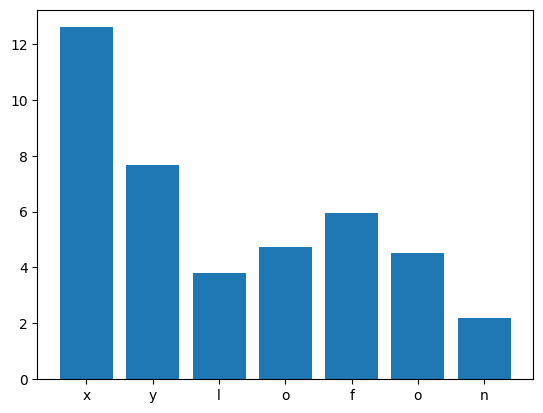

In [71]:
eight_letter_words = [word.lower() for word in words if len(word) == 8]

letters = ["x", "y", "l", "o", "f", "o", "n"]

counts = [
    len(list(filter(lambda x: x[i] == letters[i], eight_letter_words)))
    for i in range(len(letters))
]

information = [
    log2(len(eight_letter_words) / count) if count > 0 else 0 for count in counts
]

_fig, ax = plt.subplots()
ax.bar(range(len(letters)), information)
ax.set_xticks(range(len(letters)))
ax.set_xticklabels(letters)
plt.show()

### 1.3 Von vorne nach hinten und von hinten nach vorne
Wir versuchen jetzt ähnlich wie beim Orakelspiel in der Vorlesung zu bestimmen, welche Information wir gewinnen, wenn wir einen Buchstaben nach dem anderen vom Wort „Xylophon“ erraten. Dabei wollen wir einmal das Wort von vorne nach hinten und einmal von hinten nach vorne durchlaufen.

Bestimmen Sie jeweils, welche Information wir pro richtig geratenem Buchstaben gewinnen. Welche Information gewinnen wir, wenn wir wissen, dass ein Wort mit „X“ beginnt? Welche Information gewinnen wir, wenn wir wissen, dass ein Wort mit „n“ endet?

Stellen Sie den Informationsgewinn pro Buchstaben grafisch dar.

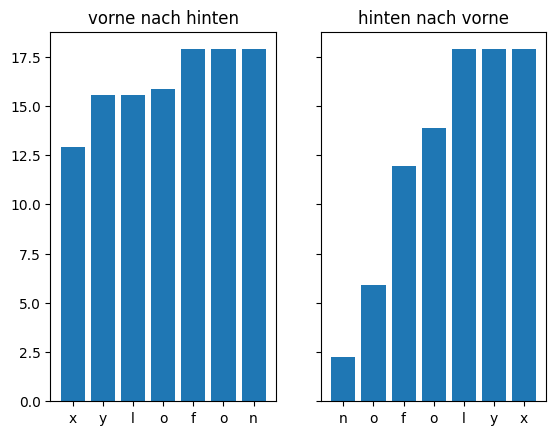

In [72]:
letters = "xylofon"

length = len(letters)

front_to_back = [0 for _ in range(length)]
back_to_front = [0 for _ in range(length)]

for i in range(length):
    matching_front = [
        word for word in words if word.strip().lower().startswith(letters[: i + 1])
    ]

    matching_back = [
        word for word in words if word.strip().lower().endswith(letters[-(i + 1):])
    ]

    count_front = len(matching_front)
    count_back = len(matching_back)

    front_to_back[i] = log2(len(words) / count_front) if count_front > 0 else 0
    back_to_front[i] = log2(len(words) / count_back) if count_back > 0 else 0

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.bar(range(length), front_to_back)
ax1.set_title("vorne nach hinten")
ax1.set_xticks(range(length))
ax1.set_xticklabels(letters)

ax2.bar(range(length), back_to_front)
ax2.set_title("hinten nach vorne")
ax2.set_xticks(range(length))
ax2.set_xticklabels(letters[::-1])

plt.show()

## 2 Nachrichtenquelle
In dieser Aufgabe soll eine Klasse Nachrichtenquelle (oder Source) implementiert werden. Der Konstruktor der Nachrichtenquelle erhält ein Wort, das die Auftrittswahrscheinlichkeiten der Zeichen für die Nachrichtenquelle festlegt. Bestimmen Sie im Konstruktor außerdem die Auftrittswahrscheinlichkeit der Zeichen, den Informationsgehalt der Zeichen sowie die Entropie der Zeichen. Speichern Sie diese Werte als Attribute.

In [73]:
from typing import Dict


class LetterStat:
    """Class to keep track of stats for a certain letter"""

    def __init__(
            self, frequency: int, probability: float, information: float, entropy: float
    ):
        self.frequency = frequency
        self.probability = probability
        self.information = information
        self.entropy = entropy

    def __str__(self):
        return "\tFreq: {}\n\tProb: {}\n\tInfo: {}\n\tEntr: {}".format(
            self.frequency, self.probability, self.information, self.entropy
        )


class Source:
    """Class to calculate statistics to each letter for a word"""

    letter_stats: Dict[str, LetterStat]

    def __init__(self, word: str):
        frequencies = Counter(list(word.lower()))
        self.letter_stats = {
            char: LetterStat(
                count,
                count / len(word),
                log2(len(word) / count),
                (count / len(word)) * log2(len(word) / count),
            )
            for char, count in frequencies.items()
            if char.isalpha()
        }

    def print_stats(self):
        for char, stat in self.letter_stats.items():
            print("'", char, "':", stat, end="\n\n")

    def get_stats(self) -> list[tuple[str, int, int]]:
        items = []
        for char, item in self.letter_stats.items():
            items.append((char, item.frequency, item.information))
        return items

    def length(self) -> int:
        return len(self.letter_stats)


### 2.1 Test
Test mit dem Wort 'Hochschule'

In [74]:
hochschule = Source("Hochschule")
hochschule.print_stats()

' h ': 	Freq: 3
	Prob: 0.3
	Info: 1.7369655941662063
	Entr: 0.5210896782498619

' o ': 	Freq: 1
	Prob: 0.1
	Info: 3.321928094887362
	Entr: 0.33219280948873625

' c ': 	Freq: 2
	Prob: 0.2
	Info: 2.321928094887362
	Entr: 0.46438561897747244

' s ': 	Freq: 1
	Prob: 0.1
	Info: 3.321928094887362
	Entr: 0.33219280948873625

' u ': 	Freq: 1
	Prob: 0.1
	Info: 3.321928094887362
	Entr: 0.33219280948873625

' l ': 	Freq: 1
	Prob: 0.1
	Info: 3.321928094887362
	Entr: 0.33219280948873625

' e ': 	Freq: 1
	Prob: 0.1
	Info: 3.321928094887362
	Entr: 0.33219280948873625



### 2.2 RFC 2324
Im weiteren Verlauf der Aufgabe wollen wir den RFC 2334 „Hyper Text Coffee Pot Control Protocol“ (https://www.rfc-editor.org/rfc/rfc2324, auch Standardisierer versuchen lustig zu sein) als Beispiel verwenden. Generieren Sie eine Nachrichtenquelle nach RFC 2334.

Stellen Sie die Häufigkeit der Zeichen und den Informationsgehalt der Zeichen graphisch dar.

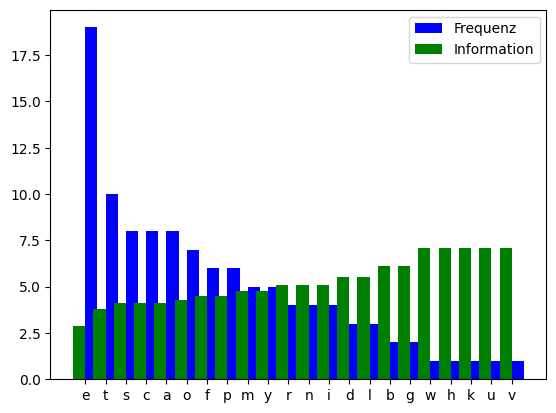

In [75]:
from operator import itemgetter

htcpcp = (
    "BREW\r\n"
    "Scheme: coffee\r\n"
    "Content-Type: message/coffeepot\r\n"
    "Accept-Additions: milk-type/Cream, syrup-type/Vanilla\r\n"
    "coffee-message-body=start\r\n"
)

htcpcp_source = Source(htcpcp)

stats = htcpcp_source.get_stats()
stats.sort(key=itemgetter(1), reverse=True)

ax = plt.subplot()
w = 0.3
ax.bar(
    [x + w for x in range(len(stats))],
    [x[1] for x in stats],
    width=2 * w,
    label="Frequenz",
    color="b",
    align="center",
)
ax.bar(
    [x - w for x in range(len(stats))],
    [x[2] for x in stats],
    width=2 * w,
    label="Information",
    color="g",
    align="center",
)
ax.set_xticks(range(len(stats)))
ax.set_xticklabels([x[0] for x in stats])
ax.legend()
plt.show()

## 3 Entropiecodierung
In dieser Aufgabe geht es um die Entropiecodierung. In Aufgabe 3.1 sollen Sie entweder die Codierungsvorschrift nach Shannon oder nach Hoffman implementieren. In Aufgabe 3.2 soll eine Klasse Code erstellt werden, die die Codierung bzw. Dekodierung nach der Codierungsvorschrift durchführt. In Aufgabe 3.3 sollen dann Shannon, Huffman und arithmetische Codierung vergleichen werden.
### 3.1 Codierungsvorschrift
Implementieren Sie eine Funktion zur Erstellung der Codierungsvorschrift nach Shannon oder nach Huffman. Das entspricht den Beispielen, die wir in der Vorlesung durchgeführt haben. Finden Sie sich mit einem Partner-Team zusammen, so dass ein Team Shannon und eine Team Huffman implementiert. Danach können Sie den Code austauschen und gegenseitig testen.

Die Codierungsvorschrift soll das Dictionary implementiert werden, das einen Buchstaben als „Key“ auf den Binär-Code als „Value“ abbildet.

In [76]:
from heapq import heappush, heappop


# --- Huffman coding ---


class HuffmanNode:
    def __init__(self, freq, symbol, left=None, right=None):
        self.freq = freq
        self.symbol = symbol
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq


def huffman_coding(text: str) -> dict[str, str]:
    # Calculate frequency of each character
    frequency = Counter(text)

    # Create a priority queue (min-heap)
    heap = []
    for char, freq in frequency.items():
        heappush(heap, HuffmanNode(freq, char))

    while len(heap) > 1:
        # Pop the two nodes with the smallest frequency
        left = heappop(heap)
        right = heappop(heap)

        # Push the new node back into the heap
        heappush(
            heap,
            HuffmanNode(
                left.freq + right.freq, left.symbol + right.symbol, left, right
            ),
        )

    huffman_dict = {}

    # Generate Huffman codes
    def generate_codes(node: HuffmanNode, current_code: str) -> None:
        if node is None:
            return

        if node.left is None and node.right is None:
            huffman_dict[node.symbol] = current_code
            return

        generate_codes(node.left, current_code + "0")
        generate_codes(node.right, current_code + "1")

    root = heappop(heap)
    generate_codes(root, "")
    return huffman_dict


def from_huffman_dict(huffman_dict: dict[str, str], message: list[str]) -> str:
    reverse_huffman_dict = {v: k for k, v in huffman_dict.items()}
    return "".join(reverse_huffman_dict[m] for m in message)


# --- Shannon-Fano coding ---


class ShannonFanoNode:
    def __init__(self):
        self.sym = ""
        self.pro = 0.0
        self.code = ""

    def __lt__(self, other):
        return self.pro < other.pro


def _shannon_fano(low: int, high: int, nodes: list[ShannonFanoNode]) -> None:
    pack1 = 0
    pack2 = 0
    if (low + 1) == high or low == high or low > high:
        if low == high or low > high:
            return
        nodes[high].code += "0"
        nodes[low].code += "1"

        return
    else:
        for i in range(low, high):
            pack1 = pack1 + nodes[i].pro
        pack2 = pack2 + nodes[high].pro
        diff1 = abs(pack1 - pack2)
        j = 2
        k = 0
        while j != high - low + 1:
            k = high - j
            pack1 = pack2 = 0
            for i in range(low, k + 1):
                pack1 = pack1 + nodes[i].pro
            for i in range(high, k, -1):
                pack2 = pack2 + nodes[i].pro
            diff2 = abs(pack1 - pack2)
            if diff2 >= diff1:
                break
            diff1 = diff2
            j += 1
        k += 1
        for i in range(low, k + 1):
            nodes[i].code += "1"
        for i in range(k + 1, high + 1):
            nodes[i].code += "0"

        _shannon_fano(low, k, nodes)
        _shannon_fano(k + 1, high, nodes)


def shannon_fano(text: str) -> dict[str, str]:
    counter = Counter(text)

    nodes: list[ShannonFanoNode] = []
    n = len(counter)

    for char, freq in counter.items():
        node = ShannonFanoNode()
        node.sym = char
        node.pro = freq / len(text)
        nodes.append(node)

    nodes.sort()

    _shannon_fano(0, n - 1, nodes)

    shannon_fano_dict = {node.sym: node.code for node in nodes}

    return shannon_fano_dict


def from_shannon_fano(shannon_fano_dict: dict[str, str], message: list[str]) -> str:
    reverse_shannon_fano_dict = {v: k for k, v in shannon_fano_dict.items()}
    return "".join(reverse_shannon_fano_dict[m] for m in message)



#### 3.1.1 Test
Mit Beispielen aus der Vorlesung

In [77]:
examples = ["hochschule", "aaaaaaaaaaaabbbbbbcccccddddeeee"]

for example in examples:
    print("\nHuffman coding for:", example)
    huffman_dict = huffman_coding(example)
    print("Huffman codes:", huffman_dict)
    print(
        "L = {:1.3f}".format(
            sum(
                len(code)
                * len("".join(filter(lambda x: x == letter, example)))
                / len(example)
                for letter, code in huffman_dict.items()
            )
        )
    )
    print(
        "Decoded Huffman codes:",
        from_huffman_dict(huffman_dict, [huffman_dict[letter] for letter in example]),
    )

    print("\nShannon-Fano coding for:", example)
    shannon_fano_dict = shannon_fano(example)
    print("Shannon-Fano codes:", shannon_fano_dict)
    print(
        "L = {:1.3f}".format(
            sum(
                len(code)
                * len("".join(filter(lambda x: x == letter, example)))
                / len(example)
                for letter, code in shannon_fano_dict.items()
            )
        )
    )
    print(
        "Decoded Shannon-Fano codes:",
        from_shannon_fano(
            shannon_fano_dict, [shannon_fano_dict[letter] for letter in example]
        ),
    )


Huffman coding for: hochschule
Huffman codes: {'e': '000', 's': '001', 'o': '010', 'l': '011', 'u': '100', 'c': '101', 'h': '11'}
L = 2.700
Decoded Huffman codes: hochschule

Shannon-Fano coding for: hochschule
Shannon-Fano codes: {'o': '1111', 's': '1110', 'u': '110', 'l': '101', 'e': '100', 'c': '01', 'h': '00'}
L = 2.700
Decoded Shannon-Fano codes: hochschule

Huffman coding for: aaaaaaaaaaaabbbbbbcccccddddeeee
Huffman codes: {'a': '0', 'd': '100', 'e': '101', 'c': '110', 'b': '111'}
L = 2.226
Decoded Huffman codes: aaaaaaaaaaaabbbbbbcccccddddeeee

Shannon-Fano coding for: aaaaaaaaaaaabbbbbbcccccddddeeee
Shannon-Fano codes: {'d': '111', 'e': '110', 'c': '10', 'b': '01', 'a': '00'}
L = 2.258
Decoded Shannon-Fano codes: aaaaaaaaaaaabbbbbbcccccddddeeee


### 3.2 Codieren und Dekodieren
In dieser Aufgabe soll eine Klasse Code zum Codieren und Dekodieren von Nachrichten entsprechend einer Codierungsvorschrift implementiert werden. Der Konstruktor der Klasse enthält eine Nachrichtenquelle sowie eine Funktion zum Erstellen der Codierungsvorschrift, d.h. entweder shannon oder huffman.

Im Konstruktor wird die Codierungsvorschrift erstellt und zusätzlich die mittlere Codewortlänge sowie die Redundanz des Codes bestimmt. Speichern Sie die Nachrichtenquelle sowie die berechneten Werte als Attribute.

Weiterhin enthält die Klasse die Methoden
- `code`, `av_char_length`, `redundancy=encode(word)`
- `word=decode(code)`

Die Methode `encode` liefert neben dem Binär-Code auch noch die mittlere Anzahl Bits pro Zeichen sowie die daraus resultierende „Redundanz“ zurück. Beachten Sie, dass diese Werte nicht unbedingt der mittleren Codewortlänge und Redundanz der Nachrichtenquelle entsprechen, sondern davon abweichen können, da die Häufigkeiten der Zeichen in der codierten Nachricht nicht exakt den Häufigkeiten der Nachrichtenquelle entsprechen.

In [78]:
from typing import Callable


class Coding:
    def __init__(self, text: str, coding: Callable[[str], dict[str, str]]):
        self.text = text
        self.coding = coding
        self.encode_dict = coding(text)
        self.decode_dict = {v: k for k, v in self.encode_dict.items()}

    def encode(self, word: str) -> tuple[str, int, int]:
        """`encode` liefert den Binärcode, die mittlere Anzahl der Bits und die daraus resultierende Redundanz"""
        code = "".join([self.encode_dict[letter] for letter in word])
        mean_length = sum(
            len(code)
            * len("".join(filter(lambda x: x == letter, self.text)))
            / len(self.text)
            for letter, code in self.encode_dict.items()
        )
        redundancy = mean_length - log2(len(self.text))
        return code, mean_length, redundancy

    def decode(self, code: str) -> str:
        """`decode` liefert den ursprünglichen Text zurück"""
        decoded = ""
        current_code = ""
        for bit in code:
            current_code += bit
            if current_code in self.decode_dict:
                decoded += self.decode_dict[current_code]
                current_code = ""
        return decoded

## 4 Vergleich
In dieser Aufgabe wollen wir die Codierungen nach Shannon, Huffman und die arithmetische Codierung vergleichen.
### 4.1 Arithmetische Codierung
Verwenden Sie für die arithmetische Codierung die Arithmetic Coding Library https://pypi.org/project/arithmetic-compressor/ mit dem StaticModel. Das StaticModel ist auf eine feste minimale Wahrscheinlichkeit festgelegt, die sie leider nur im Code selbst ändern können. Öffnen Sie daher das StaticModel und ändern Sie den SCALE_FACTOR auf 2**16. Überlegen Sie sich daher, ob Sie das Package über pip oder lokal installieren. Codierung und Dekodierung der Daten erfolgt dann wie auf in der Library beschrieben.
### 4.2 RFC 2324
Vergleichen Sie die Qualität der Codierung anhand des RFC 2334.

In [79]:
import arithmetic_compressor
from arithmetic_compressor import AECompressor
from arithmetic_compressor.models import StaticModel

arithmetic_compressor.models.static_model.SCALE_FACTOR = 2 ** 16

model = StaticModel({char: freq for (char, freq, _info) in htcpcp_source.get_stats()})
coder = AECompressor(model)

data = [letter.lower() for letter in htcpcp if letter.isalpha()]
N = len(data)

print(f"\nTo compress: '{data}' (len={len(data)})")

encoded = coder.compress(data)

ratio = (1 - len(encoded) / (len(data) * 8)) * 100
print(f"Compressed: {encoded} (len={len(encoded)})")
print(f"Compression ratio: {ratio}% (Assuming 8 bits per char)")


To compress: '['b', 'r', 'e', 'w', 's', 'c', 'h', 'e', 'm', 'e', 'c', 'o', 'f', 'f', 'e', 'e', 'c', 'o', 'n', 't', 'e', 'n', 't', 't', 'y', 'p', 'e', 'm', 'e', 's', 's', 'a', 'g', 'e', 'c', 'o', 'f', 'f', 'e', 'e', 'p', 'o', 't', 'a', 'c', 'c', 'e', 'p', 't', 'a', 'd', 'd', 'i', 't', 'i', 'o', 'n', 's', 'm', 'i', 'l', 'k', 't', 'y', 'p', 'e', 'c', 'r', 'e', 'a', 'm', 's', 'y', 'r', 'u', 'p', 't', 'y', 'p', 'e', 'v', 'a', 'n', 'i', 'l', 'l', 'a', 'c', 'o', 'f', 'f', 'e', 'e', 'm', 'e', 's', 's', 'a', 'g', 'e', 'b', 'o', 'd', 'y', 's', 't', 'a', 'r', 't']' (len=109)
Compressed: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1

### 4.3 Zufällige Nachrichten aus RFC 2324
Im zweiten Schritt wählen wir 1000 zufällige Zeichen aus dem RFC 2334 und führen die Codierung mit den drei Verfahren durch. Das wiederholen wir zehnmal.
Stellen Sie die resultierenden Codierungslängen als Balkendiagram dar.

Mittlere Länge Huffman: 4077.9
Mittlere Länge Shannon-Fano: 4099.2
Mittlere Länge arithmetisch: 4021.6


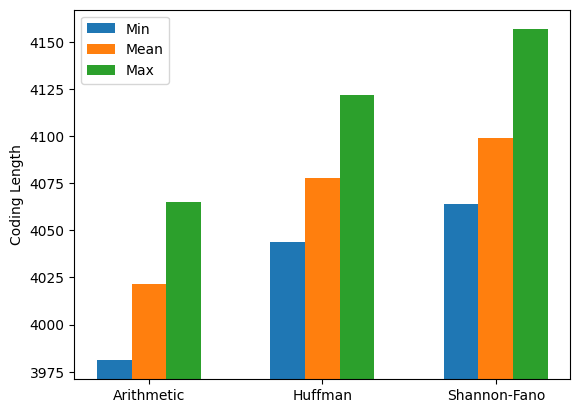

In [80]:
from random import choices


def generate_random_test(text, num):
    return "".join(choices(text, k=num))


sanitized_htcpcp = "".join(filter(lambda x: x.isalpha(), htcpcp.lower()))

coding_lengths_entropy_huffman = []
coding_lengths_entropy_shannon = []
coding_lengths_arithmetic = []

entropycoding_huffman = Coding(sanitized_htcpcp, huffman_coding)
entropycoding_shannon = Coding(sanitized_htcpcp, shannon_fano)

for _ in range(10):
    random_text = generate_random_test(sanitized_htcpcp, 1000)
    # Huffman
    code, _, _ = entropycoding_huffman.encode(random_text)
    coding_lengths_entropy_huffman.append(len(code))
    # Shannon
    code, _, _ = entropycoding_shannon.encode(random_text)
    coding_lengths_entropy_shannon.append(len(code))
    # Arithmetic
    model = StaticModel(
        {char: freq for (char, freq, _info) in Source(random_text).get_stats()}
    )
    coder = AECompressor(model)
    coding_lengths_arithmetic.append(len(coder.compress(random_text)))

# Huffman
print(
    "Mittlere Länge Huffman:",
    sum(coding_lengths_entropy_huffman) / len(coding_lengths_entropy_huffman),
)
# Shannon
print(
    "Mittlere Länge Shannon-Fano:",
    sum(coding_lengths_entropy_shannon) / len(coding_lengths_entropy_shannon),
)
# Arithmetic
print(
    "Mittlere Länge arithmetisch:",
    sum(coding_lengths_arithmetic) / len(coding_lengths_arithmetic),
)

# Calculate min, mean, and max for each encoding method
huffman_stats = (
    min(coding_lengths_entropy_huffman),
    sum(coding_lengths_entropy_huffman) / len(coding_lengths_entropy_huffman),
    max(coding_lengths_entropy_huffman),
)
shannon_stats = (
    min(coding_lengths_entropy_shannon),
    sum(coding_lengths_entropy_shannon) / len(coding_lengths_entropy_shannon),
    max(coding_lengths_entropy_shannon),
)
arithmetic_stats = (
    min(coding_lengths_arithmetic),
    sum(coding_lengths_arithmetic) / len(coding_lengths_arithmetic),
    max(coding_lengths_arithmetic),
)

# Plot
fig, ax = plt.subplots()
x_labels = ["Arithmetic", "Huffman", "Shannon-Fano"]
x_positions = range(len(x_labels))

# Plot bars for min, mean, and max
ax.bar(
    x_positions,
    [arithmetic_stats[0], huffman_stats[0], shannon_stats[0]],
    width=0.2,
    label="Min",
    align="center",
)
ax.bar(
    [x + 0.2 for x in x_positions],
    [arithmetic_stats[1], huffman_stats[1], shannon_stats[1]],
    width=0.2,
    label="Mean",
    align="center",
)
ax.bar(
    [x + 0.4 for x in x_positions],
    [arithmetic_stats[2], huffman_stats[2], shannon_stats[2]],
    width=0.2,
    label="Max",
    align="center",
)

min_value = min(huffman_stats[0], shannon_stats[0], arithmetic_stats[0])
max_value = max(huffman_stats[2], shannon_stats[2], arithmetic_stats[2])
ax.set_ylim([min_value - 10, max_value + 10])

ax.set_xticks([x + 0.2 for x in x_positions])
ax.set_xticklabels(x_labels)
ax.set_ylabel("Coding Length")
ax.legend()
plt.show()